In [58]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

Source data:
Table 20 from: https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/datasets/theeffectsoftaxesandbenefitsonhouseholdincomefinancialyearending2014

Note used: https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/datasets/householdincomespendingandwealthingreatbritain

Set some parameters

In [589]:
# Total population
popT=65e6
# Population in quintile
popQ = popT / 5
# 
decLab='Decile (Equivalised Original Household Income)'

Read in the data

In [590]:
data=pd.read_excel('data/data.xlsx',sheet_name='Deciles')
# Print the column names
data.columns

Index(['Decile', 'OriginalIncomeEqMin', 'OriginalIncomeEqMax', 'Nindividuals',
       'Nhouseholds', 'OriginalIncome', 'OriginalIncomeEq', 'DirectBenefits',
       'GrossIncome', 'GrossIncomeEq', 'DirectTax', 'DisposableIncome',
       'DisposableIncomeEq', 'IndirectTax', 'PostTaxIncome', 'PostTaxIncomeEq',
       'BenefitsInKind', 'FinalIncome', 'FinalIncomeEq'],
      dtype='object')

In [591]:
decile=data['Decile']
origIncome=data['OriginalIncome']
origIncomeEq=data['OriginalIncomeEq']
dirBen=data['DirectBenefits']
grossIncome=data['GrossIncome']
dirTax=data['DirectTax']
dispIncome=data['DisposableIncome']
indirTax=data['IndirectTax']
postIncome=data['PostTaxIncome']
kindBen=data['BenefitsInKind']
finalIncome=data['FinalIncome']
nEquiv=data['OriginalIncome']/data['OriginalIncomeEq']

##### Quick look at data

Text(0,0.5,'avg £ per decile')

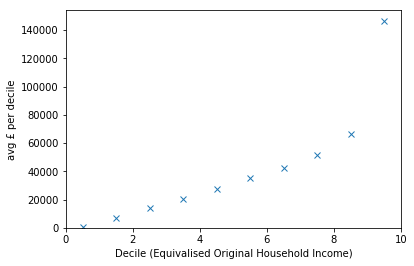

In [592]:
plot.plot(data['Decile']-0.5,data['OriginalIncomeEq'],'x')
plot.xlim(0,10)
plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')

Text(0,0.5,'avg £ per decile')

/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


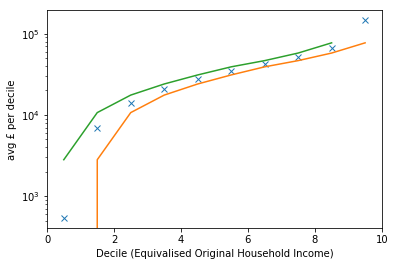

In [593]:
plot.plot(data['Decile']-0.5,data['OriginalIncomeEq'],'x')
plot.plot(data['Decile']-0.5,data['OriginalIncomeEqMin'],'-')
plot.plot(data['Decile']-0.5,data['OriginalIncomeEqMax'],'-')
plot.yscale('log')
plot.xlim(0,10)
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')

### Model the distribution (basic)

Assume a linear income distribution ($Y$) vs ranking ($n$): $Y(n) = Y_0 + an$, with $Y(N)=Y_1$ and $\Delta Y(n)=Y(n)-Y_1$.


In [623]:
y0 = np.array(data['OriginalIncomeEqMin'])
y1 = np.array(data['OriginalIncomeEqMax'])
ybar = np.array(data['OriginalIncomeEq'])
print(y0,y1,ybar)
model_a=np.where(np.isfinite(y1),(y1-y0),(ybar-y0)*2)

# adjust for zero-income

# 0.5 * (1-n0) * y1 = ybar
n_zero=1-(2*ybar[0]/y1[0])
print(n_zero)
model_a[0]=y1[0]/(1-n_zero)
y0[0]=y1[0]-model_a[0]
print(y0,y1,model_a)

def model(n,model=model_a,y0=y0,nEquiv=nEquiv,Eq=True):
    if np.isscalar(n):
        q=np.min([9,int(np.floor(n*10))])
    else:
        q = np.floor(n*10).astype(int)
    mody=np.maximum(0,y0[q] + model_a[q]*(10*n-q))
    if not Eq:
        mody = mody * nEquiv
    return(mody)

[    0  2808 10687 17559 24055 31085 39120 46657 57840 77257] [ 2808. 10687. 17559. 24055. 31085. 39120. 46657. 57840. 77257.    nan] [   539   6881  14013  20593  27385  35073  42493  51462  66323 146627]
0.6160968660968661
[-4506  2808 10687 17559 24055 31085 39120 46657 57840 77257] [ 2808. 10687. 17559. 24055. 31085. 39120. 46657. 57840. 77257.    nan] [  7314.34508349   7879.           6872.           6496.
   7030.           8035.           7537.          11183.
  19417.         138740.        ]


Text(0,0.5,'gradient over decile (£/dec)')

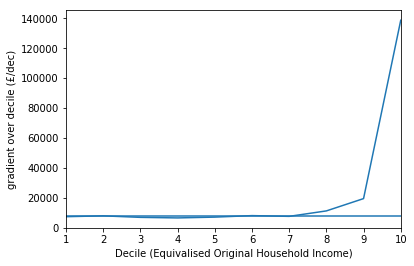

In [624]:
plot.plot(decile,model_a)
plot.axhline(np.mean(model_a[1:-2]))
plot.xlabel(decLab)
plot.xlim(1,10)
plot.ylabel('gradient over decile (£/dec)')


### test model

(0, 10000)

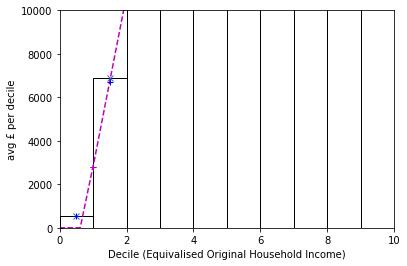

In [625]:
plot.plot(decile-0.5,data['OriginalIncomeEq'],'x')
plot.bar(decile-0.5,origIncomeEq,width=1,ls='-',fc='m',fill=None)
plot.plot(decile-1,data['OriginalIncomeEqMin'],'m+')
plot.plot(decile,data['OriginalIncomeEqMax'],'m+')

narr=np.arange(0,1,0.001)
yarr=np.array(model(narr))

origEqMod=np.zeros_like(origIncome)
for q in np.arange(1,11):
    ind=np.where((narr<q/10)&(narr>=(q-1)/10))
    yind=yarr[ind]
#     print(q,yarr[ind])
    origEqMod[q-1]=np.mean(yarr[ind])
# print(origEqMod)
# print(origIncomeEq)
plot.plot(narr*10,yarr,'m--')
plot.plot(decile-0.5,origEqMod,'b+')
plot.xlim(0,10)
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.ylim(0,10000)
    

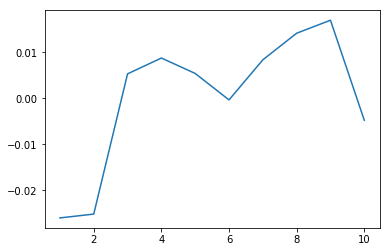

In [626]:
plot.plot(decile,origEqMod/origIncomeEq - 1)

In [511]:
np.array(yarr)

array([     0. ,    280.8,    561.6,    842.4,   1123.2,   1404. ,
         1684.8,   1965.6,   2246.4,   2527.2,   2808. ,   3595.9,
         4383.8,   5171.7,   5959.6,   6747.5,   7535.4,   8323.3,
         9111.2,   9899.1,  10687. ,  11374.2,  12061.4,  12748.6,
        13435.8,  14123. ,  14810.2,  15497.4,  16184.6,  16871.8,
        17559. ,  18208.6,  18858.2,  19507.8,  20157.4,  20807. ,
        21456.6,  22106.2,  22755.8,  23405.4,  24055. ,  24758. ,
        25461. ,  26164. ,  26867. ,  27570. ,  28273. ,  28976. ,
        29679. ,  30382. ,  31085. ,  31888.5,  32692. ,  33495.5,
        34299. ,  35102.5,  35906. ,  36709.5,  37513. ,  38316.5,
        39120. ,  39873.7,  40627.4,  41381.1,  42134.8,  42888.5,
        43642.2,  44395.9,  45149.6,  45903.3,  46657. ,  47775.3,
        48893.6,  50011.9,  51130.2,  52248.5,  53366.8,  54485.1,
        55603.4,  56721.7,  57840. ,  59781.7,  61723.4,  63665.1,
        65606.8,  67548.5,  69490.2,  71431.9,  73373.6,  7531

## Test taxable income

In [458]:
tax20=11850
tax40=34500+tax20
tax45=150000+tax20
taxableInc=origIncome+dirBen
taxable20=np.maximum(0,np.where(taxableInc<tax40,taxableInc-tax20,tax40-tax20))
taxable40=np.maximum(0,np.where(taxableInc<tax45,taxableInc-tax40,tax45-tax40))
taxable45=np.maximum(0,taxableInc-tax45)
taxPaid=taxable20*0.2 + taxable40*0.4 + taxable45*0.45

In [470]:
dirTaxMod=np.zeros(10)
for q in range(10):
    narr=np.arange(q*0.1,(q+1)*0.1,0.01)
    tInc=model(narr,Eq=False)+dirBen[q]
    t20=np.maximum(0,np.where(tInc<tax40,tInc-tax20,tax40-tax20))
    t40=np.maximum(0,np.where(tInc<tax45,tInc-tax40,tax45-tax40))
    t45=np.maximum(0,tInc-tax45)
    tPaid=t20*0.2 + t40*0.4 + t45*0.45
    dirTaxMod[q]=np.mean(tPaid)

/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in maximum
  import sys


136256.05
135789


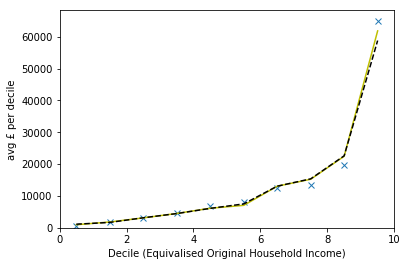

In [471]:
plot.plot(data['Decile']-0.5,data['DirectTax'],'x')
plot.plot(data['Decile']-0.5,taxPaid,'y-')
plot.plot(data['Decile']-0.5,dirTaxMod,'k--')
plot.xlim(0,10)
plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
print(np.sum(taxPaid))
print(np.sum(data['DirectTax']))
totalBenefits=np.sum(dirBen)
totalDirectTax=np.sum(dirTax)
totalNetIncome=totalDirectTax-totalBenefits

136256.05
135789


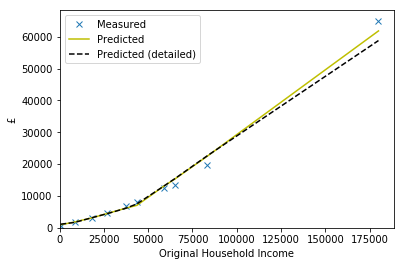

In [472]:
plot.plot(origIncome,data['DirectTax'],'x',label='Measured')
plot.plot(origIncome,taxPaid,'y-',label='Predicted')
plot.plot(origIncome,dirTaxMod,'k--',label='Predicted (detailed)')
plot.xlim(0,plot.xlim()[1])
plot.ylim(0,plot.ylim()[1])
plot.xlabel('Original Household Income')
plot.ylabel('£')
plot.legend()
print(np.sum(taxPaid))
print(np.sum(data['DirectTax']))
totalBenefits=np.sum(dirBen)
totalDirectTax=np.sum(dirTax)
totalNetIncome=totalDirectTax-totalBenefits

Total Measured Tax: 135789
Total Modelled Tax: 133932.0433866502 (-1.3675309585826412%)


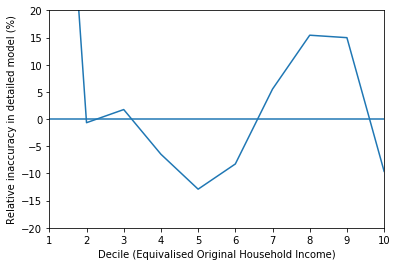

In [480]:
plot.plot(decile,100*(dirTaxMod/dirTax-1))
plot.xlabel(decLab)
plot.ylabel('Relative inaccuracy in detailed model (%)')
plot.ylim(-20,20)
plot.xlim(1,10)
plot.axhline(0)
totDirTax=np.sum(dirTax)
totDirTaxMod=np.sum(dirTaxMod)
print('Total Measured Tax: {}'.format(totDirTax))
print('Total Modelled Tax: {} ({}%)'.format(totDirTaxMod,100*(totDirTaxMod/totDirTax-1)))

Total direct benefits: 62367
Total direct tax: 135789
Net National Income: 73422


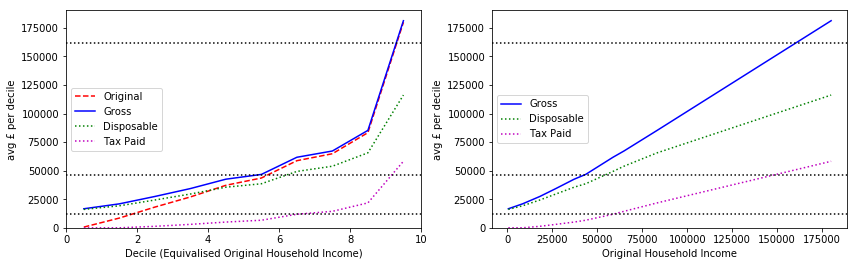

In [440]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile-0.5,origIncome,'r--',label='Original')
plot.plot(decile-0.5,grossIncome,'b-',label='Gross')
plot.plot(decile-0.5,dispIncome,'g:',label='Disposable')
plot.plot(decile-0.5,taxPaidDet,'m:',label='Tax Paid')
plot.legend()
plot.xlim(0,10)
plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.axhline(tax20,c='k',ls=':')
plot.axhline(tax40,c='k',ls=':')
plot.axhline(tax45,c='k',ls=':')

plot.subplot(1,2,2)
plot.plot(origIncome,grossIncome,'b-',label='Gross')
plot.plot(origIncome,dispIncome,'g:',label='Disposable')
plot.plot(origIncome,taxPaidDet,'m:',label='Tax Paid')
plot.legend()
plot.ylim(0,plot.ylim()[1])
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.axhline(tax20,c='k',ls=':')
plot.axhline(tax40,c='k',ls=':')
plot.axhline(tax45,c='k',ls=':')
print('Total direct benefits:',totalBenefits)
print('Total direct tax:',totalDirectTax)
print('Net National Income:',totalNetIncome)

In [439]:
### New model

In [392]:
uniBen=17000
origNew=origIncome
dirBenNew=[uniBen]*len(dirBen)
grossNew=origNew+dirBenNew

taxPaidNew=np.zeros(10)
th1=0
th2=50000
th3=100000
tax1=0.48
tax2=0.48
tax3=0.48
for q in range(10):
    narr=np.arange(q*0.1,(q+1)*0.1,0.01)
    tInc=model(narr,Eq=False)
    t1=np.maximum(0,np.where(tInc<th2,tInc-th1,th2-th1))
    t2=np.maximum(0,np.where(tInc<th3,tInc-th2,th3-th2))
    t3=np.maximum(0,tInc-th3)
    tPaidNew=t1*tax1 + t2*tax2 + t3*tax3
    taxPaidNew[q]=np.mean(tPaidNew)

# taxPaidNew=0.47*origNew
dispNew=grossNew-taxPaidNew
totalBenefitsNew=np.sum(dirBenNew)
totalDirectTaxNew=np.sum(taxPaidNew)
totalNetIncomeNew=totalDirectTaxNew-totalBenefitsNew

/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in maximum


Total direct benefits: 170000 [107633]
Total direct tax: 247005.57638117552 [111216.57638117552]
Net National Income: 77005.57638117552 [3583.576381175517]


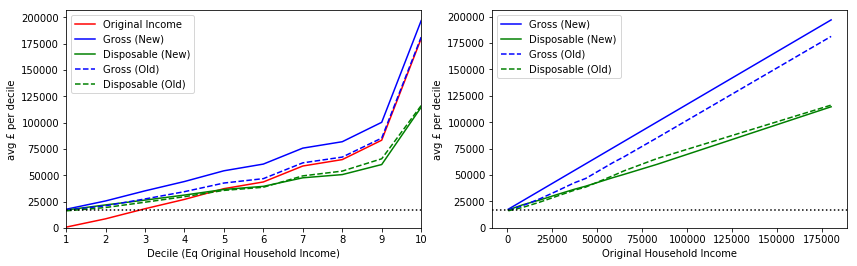

In [454]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,origIncome,'r-',label='Original Income')
plot.plot(decile,grossNew,'b-',label='Gross (New)')
plot.plot(decile,dispNew,'g-',label='Disposable (New)')
plot.plot(decile,grossIncome,'b--',label='Gross (Old)')
plot.plot(decile,dispIncome,'g--',label='Disposable (Old)')
plot.legend()
plot.xlim(1,10)
plot.xlabel('Decile (Eq Original Household Income)')
plot.ylabel('avg £ per decile')
plot.ylim(0,plot.ylim()[1])
plot.axhline(uniBen,c='k',ls=':')

plot.subplot(1,2,2)
plot.plot(origIncome,grossNew,'b-',label='Gross (New)')
plot.plot(origIncome,dispNew,'g-',label='Disposable (New)')
plot.plot(origIncome,grossIncome,'b--',label='Gross (Old)')
plot.plot(origIncome,dispIncome,'g--',label='Disposable (Old)')
plot.legend()
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.ylim(0,plot.ylim()[1])
plot.axhline(uniBen,c='k',ls=':')

print('Total direct benefits: {} [{}]'.format(totalBenefitsNew,totalBenefitsNew-totalBenefits))
print('Total direct tax: {} [{}]'.format(totalDirectTaxNew,totalDirectTaxNew-totalDirectTax))
print('Net National Income: {} [{}]'.format(totalNetIncomeNew,totalNetIncomeNew-totalNetIncome))

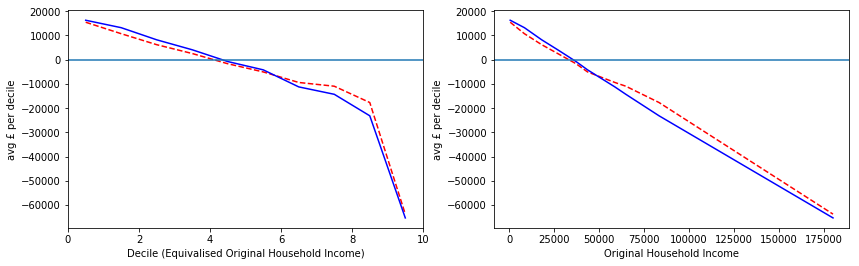

In [444]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,dirBen-dirTax,'r--',label='Net benefit (Old)')
plot.plot(decile,dirBenNew-taxPaidNew,'b-',label='Net benefit (New)')
plot.xlim(1,10)
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.axhline(0)

plot.subplot(1,2,2)
plot.plot(origIncome,dirBen-dirTax,'r--',label='Net benefit (Old)')
plot.plot(origIncome,dirBenNew-taxPaidNew,'b-',label='Net benefit (New)')
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.axhline(0)

(0, 10)

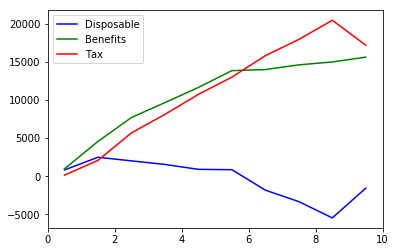

In [399]:
plot.plot(decile-0.5,dispNew-dispIncome,'b-',label='Disposable')
plot.plot(decile-0.5,dirBenNew-dirBen,'g-',label='Benefits')
plot.plot(decile-0.5,taxPaidNew-dirTax,'r-',label='Tax')
plot.legend()
plot.xlim(0,10)
plot.xlabel(decLab)


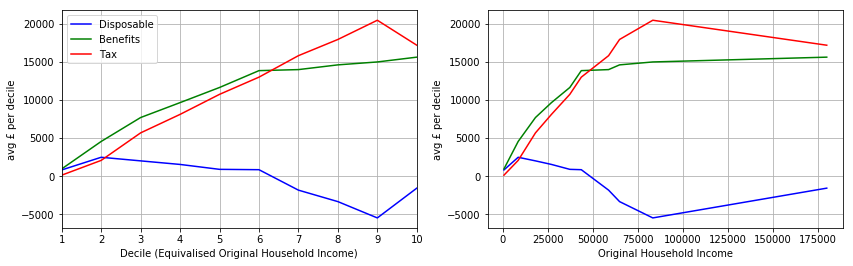

In [450]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,dispNew-dispIncome,'b-',label='Disposable')
plot.plot(decile,dirBenNew-dirBen,'g-',label='Benefits')
plot.plot(decile,taxPaidNew-dirTax,'r-',label='Tax')
plot.legend()
plot.xlim(1,10)
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.grid()

plot.subplot(1,2,2)
plot.plot(origIncome,dispNew-dispIncome,'b-',label='Disposable')
plot.plot(origIncome,dirBenNew-dirBen,'g-',label='Benefits')
plot.plot(origIncome,taxPaidNew-dirTax,'r-',label='Tax')
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.grid()